In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

---

# Step 0. Adquisicion de datos

## Dataset

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [3]:
# Adquirido de :
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [4]:
#df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

#df = pd.concat([df_train, df_test]).reset_index(drop=True)
df = pd.read_csv('train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1. Entendimiento del negocio y objetivos del KDD

## Situacion o problema

Cuando se desea comprar una casa, uno generalmente tiene en mente una lista de caracteristicas que busca en ella.  Ya sea la relacionada a la ubicacion (e.g., cercano a algun centro de trabajo, comercio, colegio), vecindario (e.g., clase socio-economica, edad promedio), tamaño, Nro. de cuartos, Nro. de baños, acceso a transporte publico, accesibilidad en carro, Nro. estacionamientos, patio o jardin, clima de la zona, ruido, entre otros.

El principal limitante muchas veces es el presupuesto maximo.  Qué tanto uno esta dispuesto a pagar por una casa que satisfaga todos (o la mayoria) de los requisitos que uno se ha planteado.

Se formulan las siguientes preguntas ¿Cómo se relacionan cada una de estas características con el precio de venta de la casa?  ¿Cómo se relaciona cada una de estas caracteristicas con el valor que uno percibe en la casa?  ¿Estas relaciones entre precio de mercado y valor percibido según cada caracteristica tienen "concordacia"?  ¿Cuáles deberia priorizar? ¿Qué criterios se deberían tener en cuenta para elegir la mejor oferta de casa para el conjunto de caracteristicas que uno busca?


## Objetivo

A partir de la problematica descrita, planteamos:

- Identificar y analizar los principales indicadores (o predictores?) en los precios de venta de las casas.
- Predecir los precios de venta de casas a partir de sus caracteristicas recolectadas. 


## Poblacion de analisis

- Espacio: Ames, Iowa, USA
- Tiempo: 2006-2010
- Inclusión: Casas residenciales
- Exclusión: Ninguno


## Recursos

- Personas: 4 estudiantes de Ing Informatica PUCP
- Fuente de Datos: Desafío Kaggle, 1460 Casas
- Herramientas: Jupyter Notebook (software libre) como entorno de selección, preprocesamiento, y entrenamiento y despliegue de modelos.


## Limitaciones

- Negocio: Acceso únicamente a los datos brindados por el Desafío Kaggle
- Datos: Se podría ampliar la cantidad de datos si se aumentara el rango de años
- Tiempo: Un semestre académico puede ser corto para cumplir nuestro objetivo de manera completa

# Step 2. Seleccion y entendimiento de datos

## Valores nulos

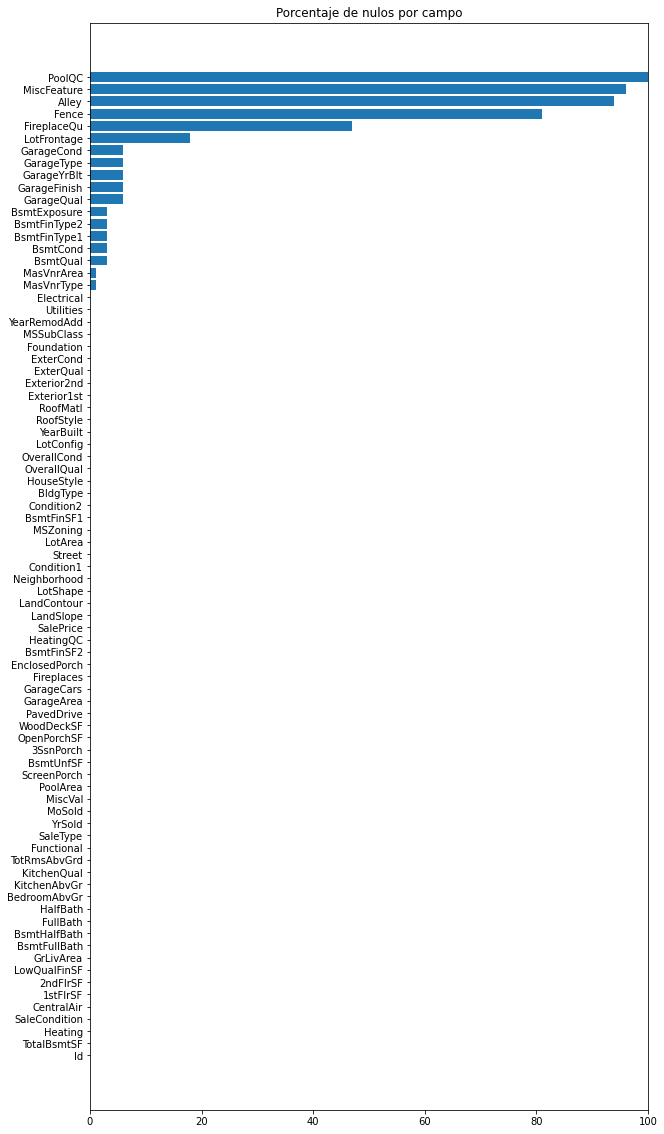

In [6]:
vacios = pd.DataFrame(df.isnull().sum()).sort_values(0,ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios']/df.shape[0], 2)*100

plt.figure(figsize=(10,20))
vac = np.arange(len(vacios['vacios%']))
plt.barh(vac, vacios['vacios%'])
plt.yticks(vac, vacios.index)
plt.xlim([0, 100])
plt.title("Porcentaje de nulos por campo")
plt.show()

## Remover duplicados

In [7]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1460, 81)
(1460, 81)


## Arreglar los tipos de datos

In [8]:
# Luego de revisar cada columna..

## CATEGORICAS
cat_cols = [
    "MSSubClass",
    "MSZoning",
    "Street",
    #"Alley",            Eliminado por muchos nulos
    "LandContour",
    "Utilities",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "OverallQual",
    "OverallCond",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "ExterQual",
    "ExterCond",
    "Foundation",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "KitchenQual",
    "Functional",
    #"FireplaceQu",     Eliminado por muchos nulos
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    #"PoolQC",          Eliminado por muchos nulos
    #"Fence",           Eliminado por muchos nulos
    #"MiscFeature",     Eliminado por muchos nulos
    "SaleType",
    "SaleCondition",
    
]

## NUMERICAS
num_cols = [
    "LotFrontage",
    "LotArea",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "SalePrice",
    "MoSold", #Mes en que fue vendido
    "YrSold",
    "YearBuilt",
    "YearRemodAdd",
    "GarageYrBlt", 
]


In [9]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
for col in cat_cols:
    df[col] = df[col].astype(object)
    

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [11]:
df_num = df[num_cols].copy()
df_cat = df[cat_cols].copy()

## Variables numericas

### Medidas de resumen para variables numericas

#### Medidas de tendencia central

In [12]:
df_num.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MoSold,YrSold,YearBuilt,YearRemodAdd,GarageYrBlt
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,6.321918,2007.815753,1971.267808,1984.865753,1978.506164
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,2.703626,1.328095,30.202904,20.645407,24.689725
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,1.000000,2006.000000,1872.000000,1950.000000,1900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,5.000000,2007.000000,1954.000000,1967.000000,1961.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,6.000000,2008.000000,1973.000000,1994.000000,1980.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,8.000000,2009.000000,2000.000000,2004.000000,2002.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,12.000000,2010.000000,2010.000000,2010.000000,2010.000000


#### Medidas de variabilidad

In [13]:
df_num.var()

LotFrontage      5.897492e+02
LotArea          9.962565e+07
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal          2.461381e+05
SalePrice        6.311111e+09
MoSold           7.309595e+00
YrSold           1.763837e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
GarageYrBl

In [14]:
# RIC 
df_num.quantile(0.75) - df_num.quantile(0.25)

LotFrontage         21.00
LotArea           4048.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
SalePrice        84025.00
MoSold               3.00
YrSold               2.00
YearBuilt           46.00
YearRemodAdd        37.00
GarageYrBlt         41.00
dtype: float64

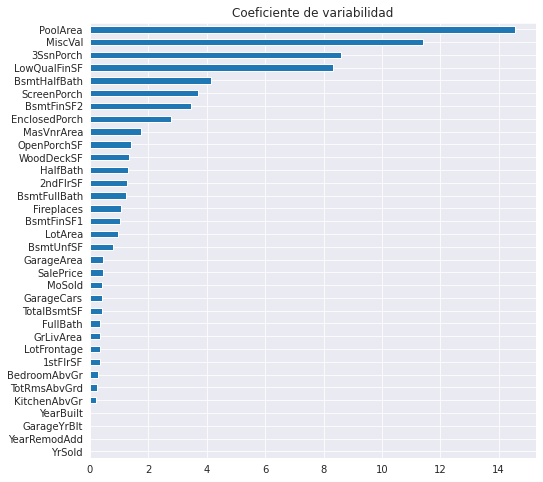

In [15]:
# Coeficientes de variacion
sns.set_style("darkgrid")

plt.figure(figsize=(8,8))
(df_num.std()/df_num.mean()).sort_values(ascending=True).plot.barh()
plt.title("Coeficiente de variabilidad")
plt.show()

### Medidas de deformacion

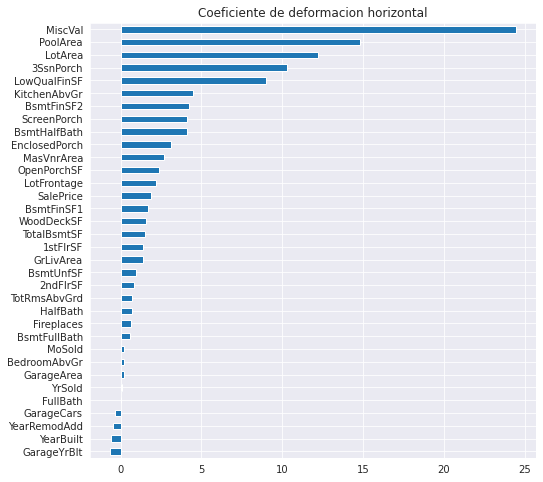

In [16]:
# Deformacion horizontal

sns.set_style("darkgrid")

plt.figure(figsize=(8,8))
df_num.skew().sort_values(ascending=True).plot.barh()
plt.title("Coeficiente de deformacion horizontal")
plt.show()

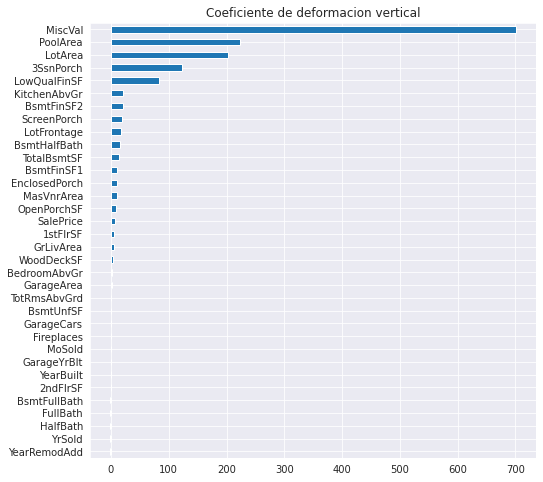

In [17]:
# Deformacion vertical (kurtosis)

sns.set_style("darkgrid")

plt.figure(figsize=(8,8))
df_num.kurt().sort_values(ascending=True).plot.barh()
plt.title("Coeficiente de deformacion vertical")
plt.show()

### Distribuciones

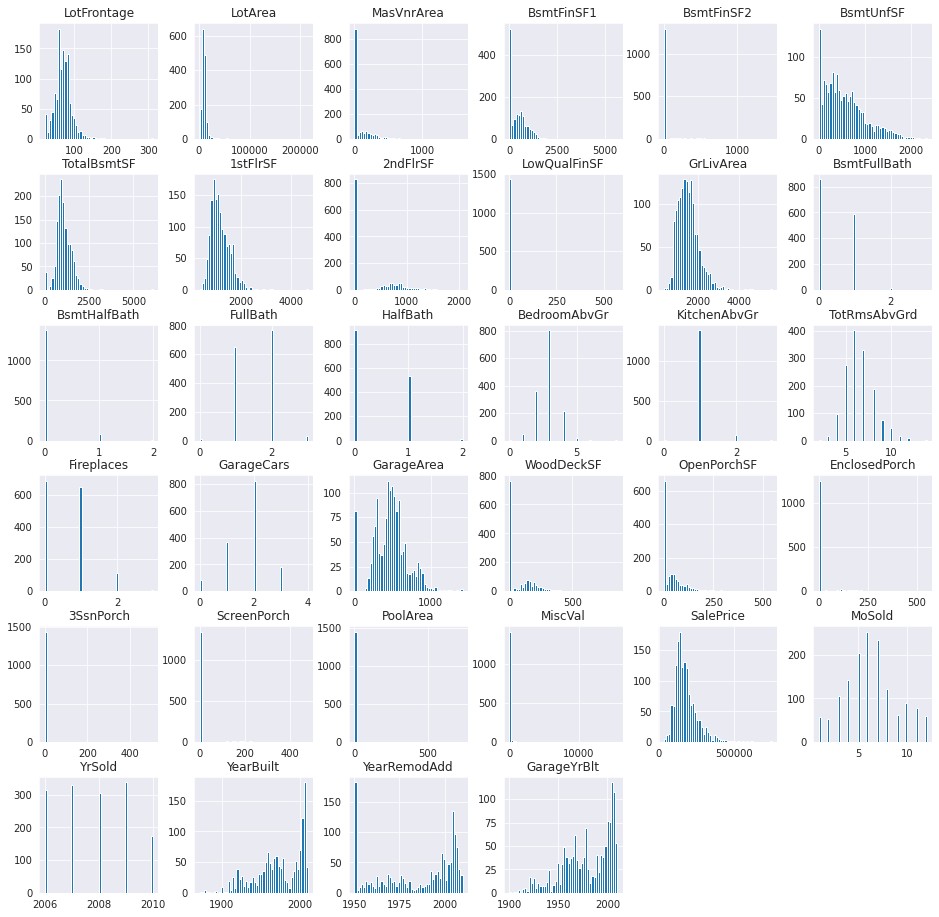

In [18]:
%matplotlib inline
df_num.hist(bins=50, figsize=(16,16))
plt.show()

## Variables categoricas

In [19]:
df_cat.mode()

,MSSubClass,MSZoning,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,20,RL,Pave,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


## Analisis adicional

In [20]:
corrmat = df_num.corr()

### Revisando la correlacion

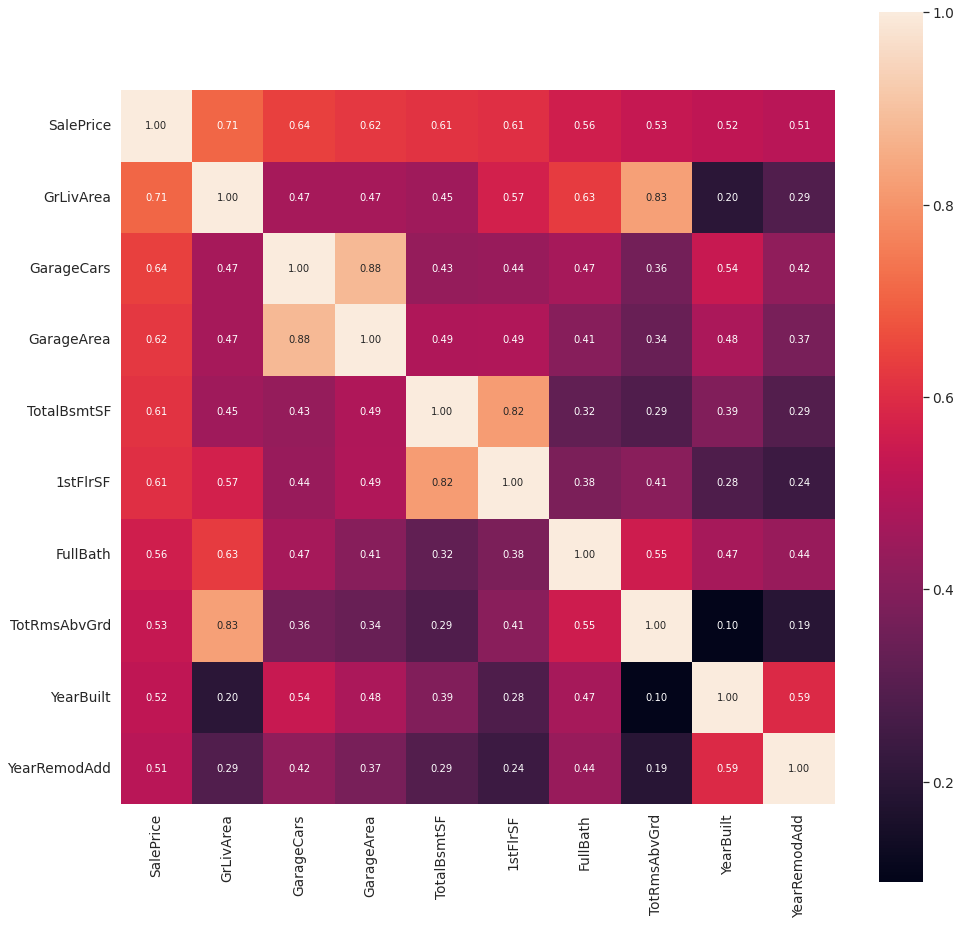

In [21]:
plt.figure(figsize=(16,16))
columns = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(df_num[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

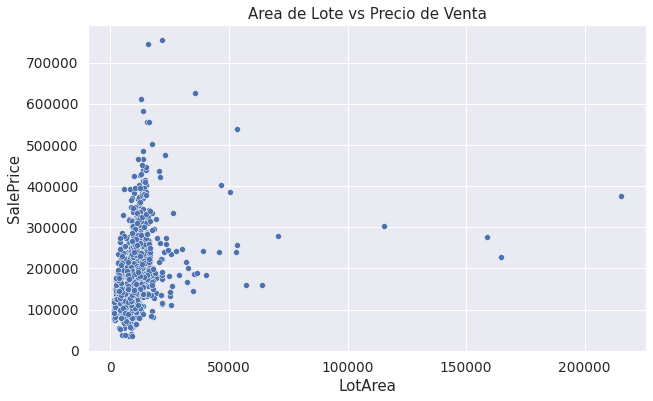

In [22]:
plt.subplots(figsize=(10,6))
plt.title("Area de Lote vs Precio de Venta")
sns.scatterplot(data = df_num, x ="LotArea", y="SalePrice")
plt.show()

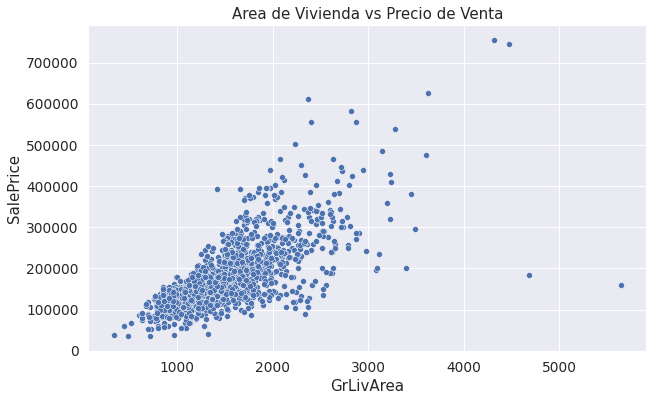

In [23]:
plt.subplots(figsize=(10,6))
plt.title("Area de Vivienda vs Precio de Venta")
sns.scatterplot(data = df_num, x ="GrLivArea", y="SalePrice")
plt.show()

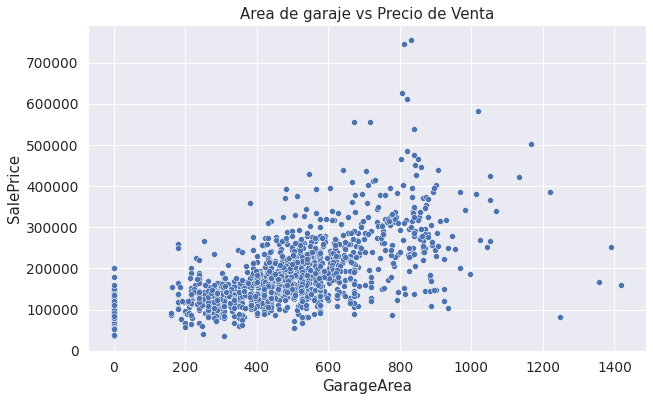

In [24]:
plt.subplots(figsize=(10,6))
plt.title("Area de garaje vs Precio de Venta")
sns.scatterplot(data = df_num, x ="GarageArea", y="SalePrice")
plt.show()

/home/mitsuo/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


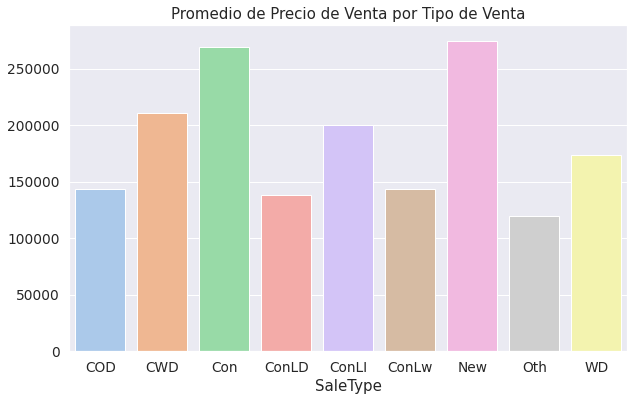

In [25]:
plt.subplots(figsize=(10,6))
plt.title("Promedio de Precio de Venta por Tipo de Venta")
sns.set(style="darkgrid")
plot = df.groupby("SaleType")["SalePrice"].mean()
sns.barplot(plot.index,plot.values,palette= "pastel")
plt.show()

/home/mitsuo/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

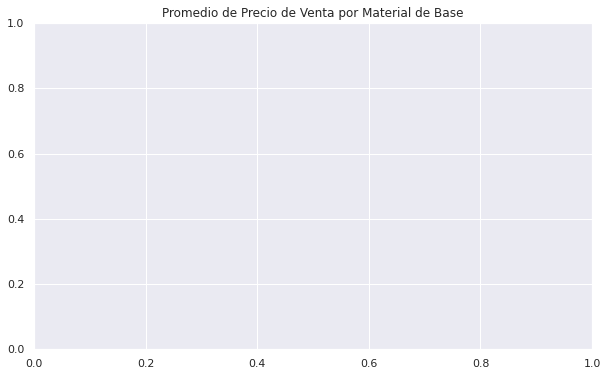

In [26]:
plt.subplots(figsize=(10,6))
plt.title("Promedio de Precio de Venta por Material de Base")
sns.set(style="darkgrid")
plot = df.groupby("Foundation")["SalePrice"].mean()
sns.barplot(plot, plot.index,plot.values,palette= "pastel")
plt.show()

In [ ]:
# Make the plot
fig = plt.figure(figsize=(20,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['TotRmsAbvGrd'], df['GrLivArea'], df['SalePrice'], cmap=plt.cm.jet, linewidth=0.2)
plt.title("Precio de Venta vs Cuartos Totales sobre Tierra vs Area de Vivienda")
plt.show()

In [ ]:
plt.subplots(figsize=(10,6))
plt.title("Año de Venta vs Precio de Venta")
sns.lineplot(data = df_num, x ="YrSold", y="SalePrice")
plt.show()

In [ ]:
plt.subplots(figsize=(10,6))
plt.title("Año de Construccion vs Precio de Venta")
sns.lineplot(data = df_num, x ="YearBuilt", y="SalePrice")
plt.show()

In [ ]:
plt.subplots(figsize=(10,6))
plt.title("Año de Remodelacion vs Precio de Venta")
sns.lineplot(data = df_num, x ="YearRemodAdd", y="SalePrice")
plt.show()

# Step 3. Preprocesamiento

## Outliers

In [27]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt'],
      dtype='object')

/tmp/ipykernel_57841/596842246.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 5))


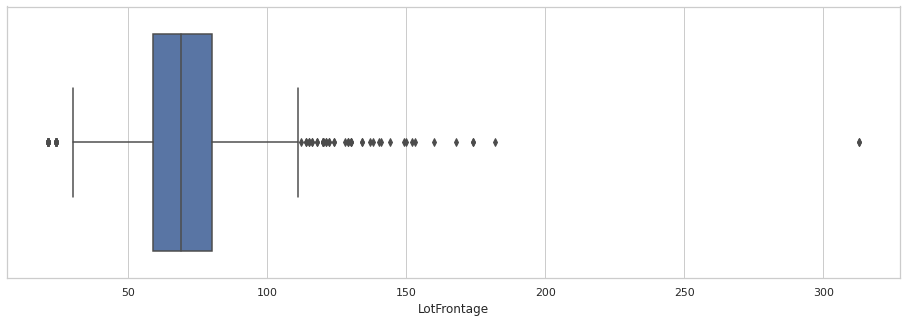

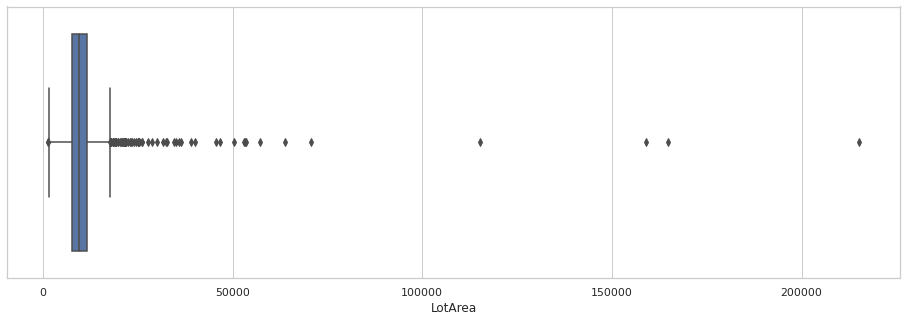

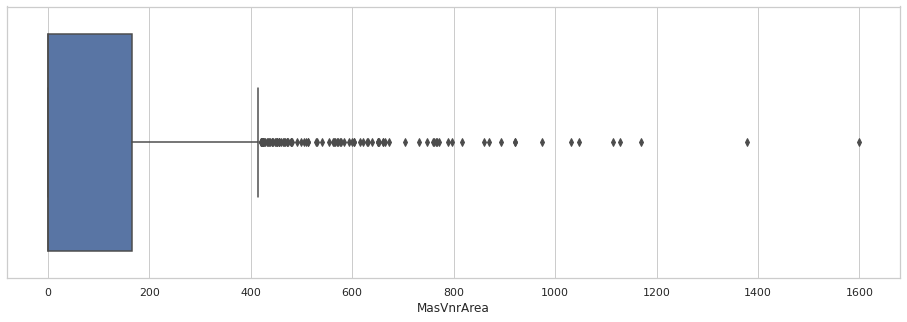

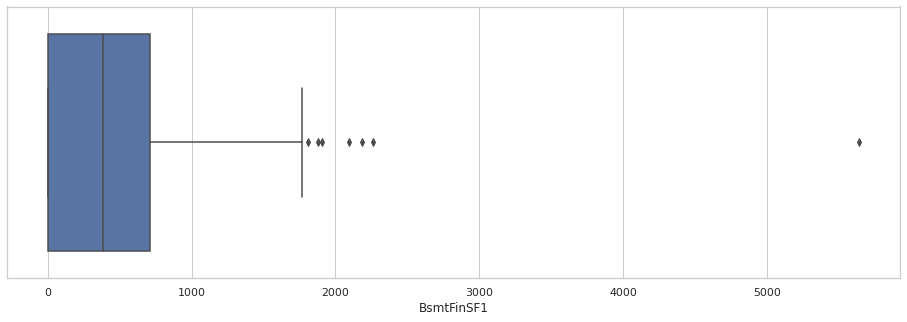

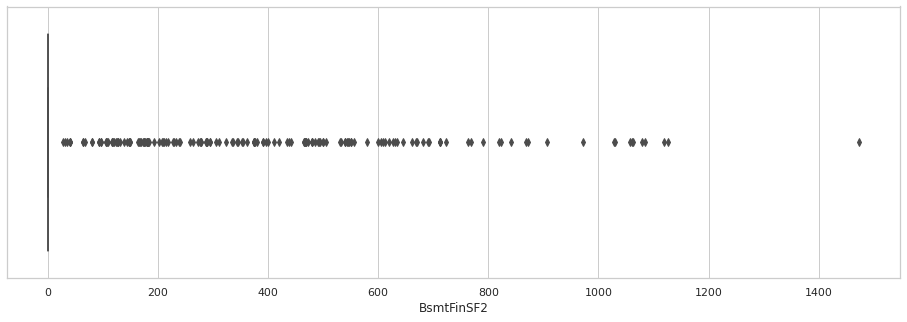

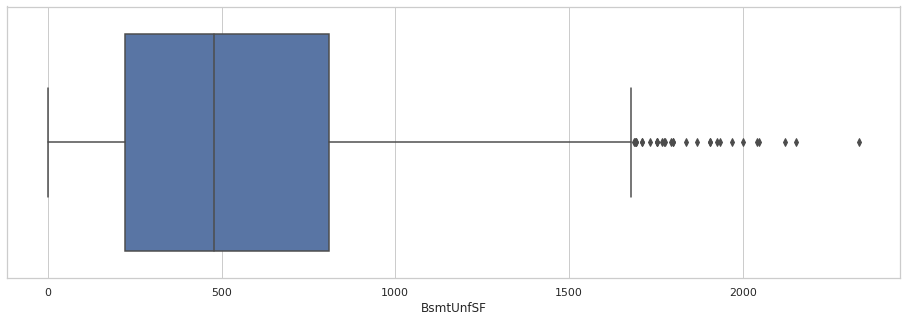

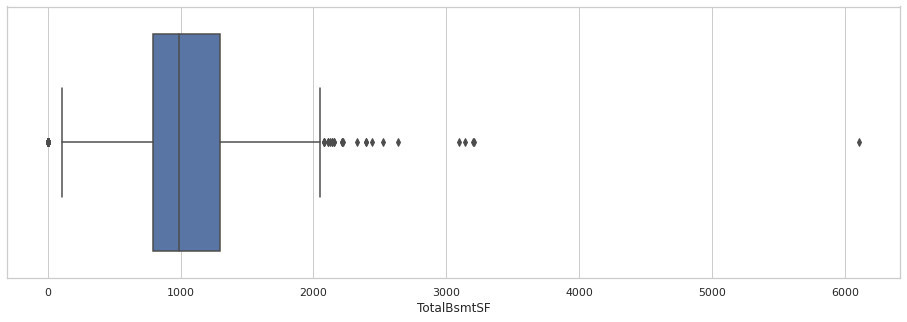

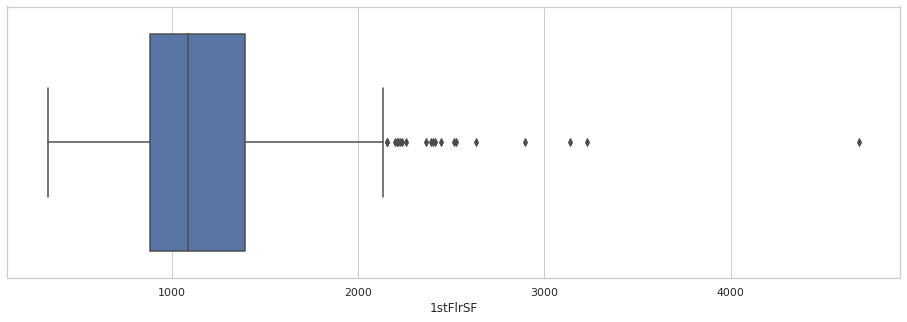

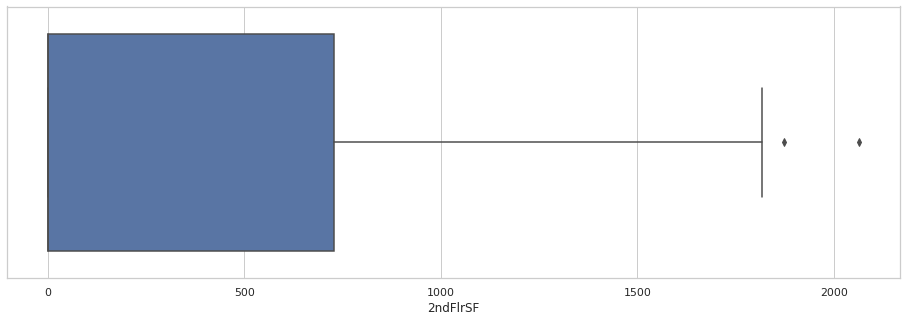

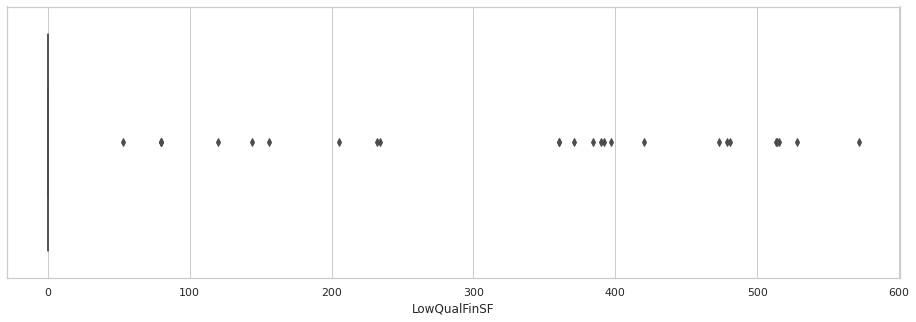

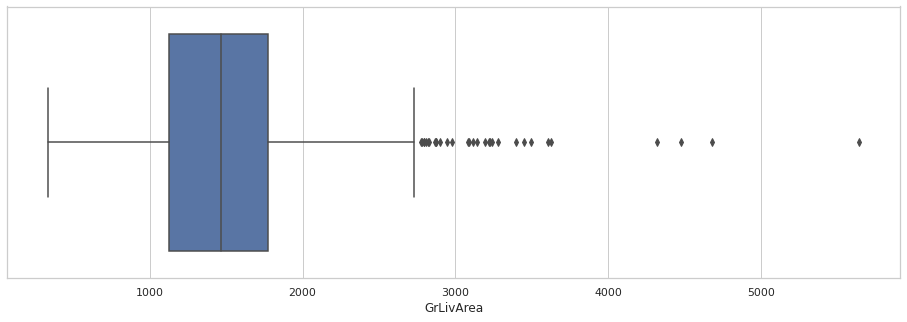

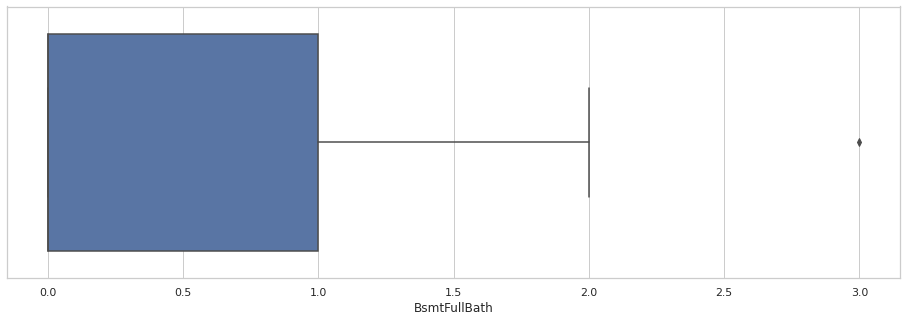

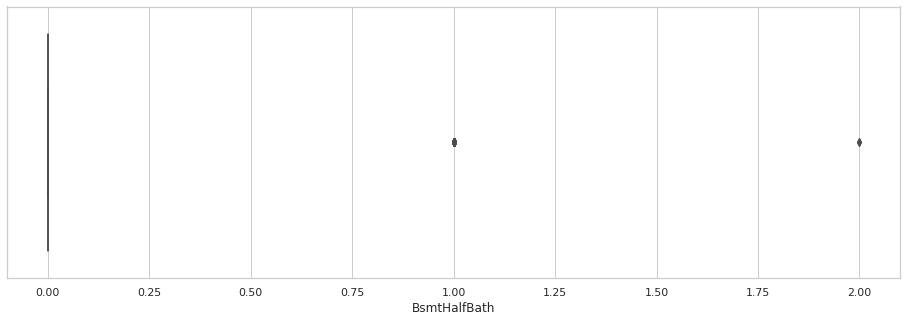

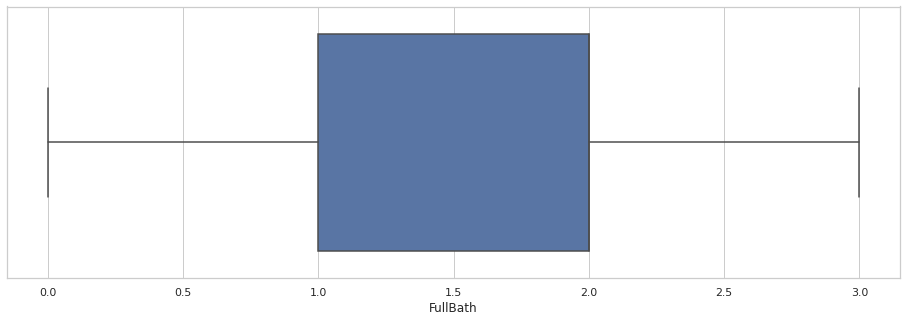

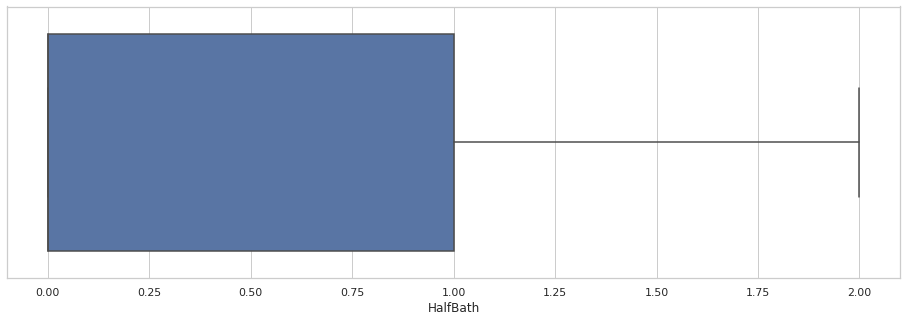

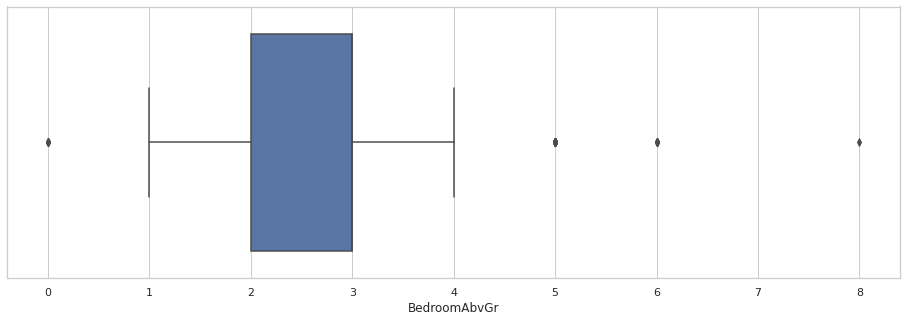

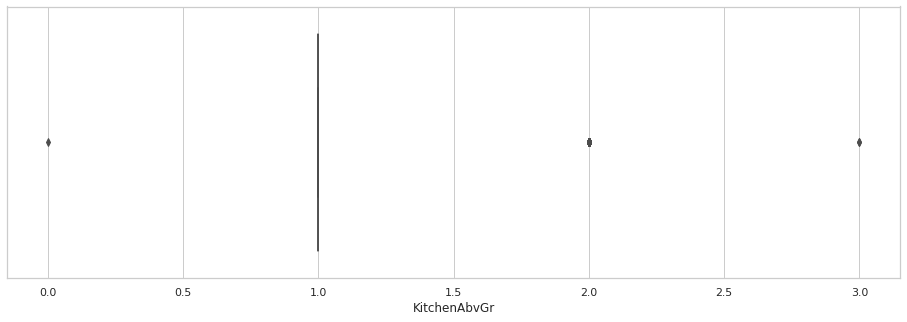

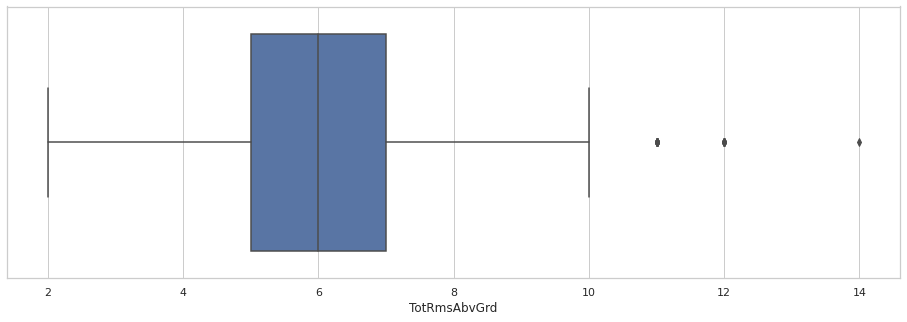

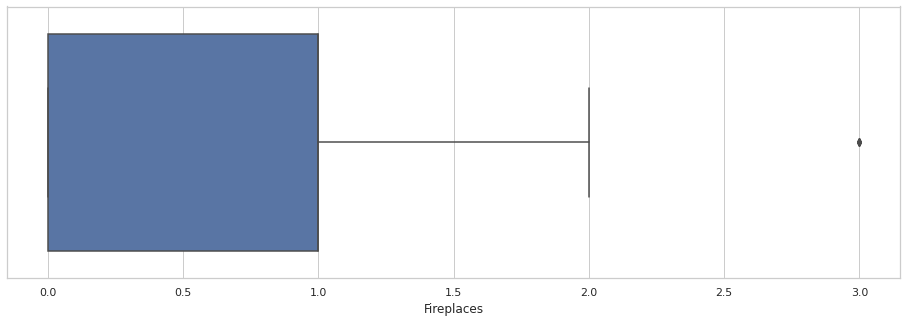

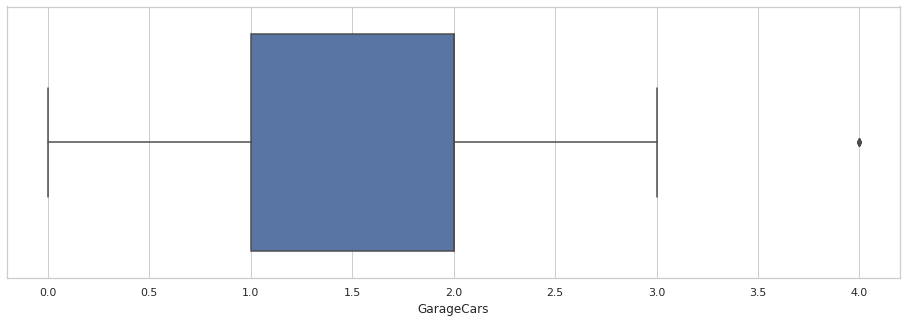

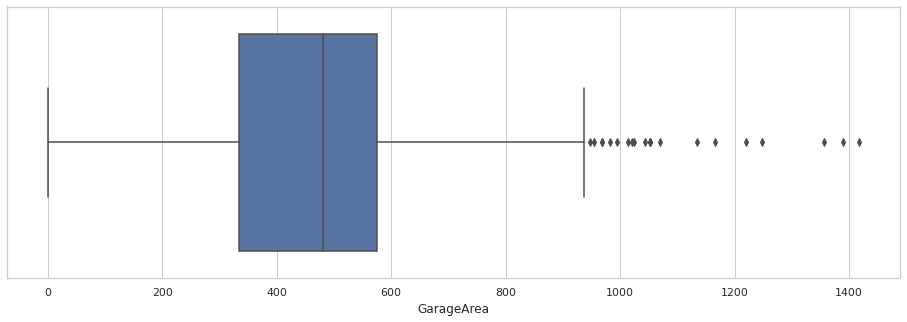

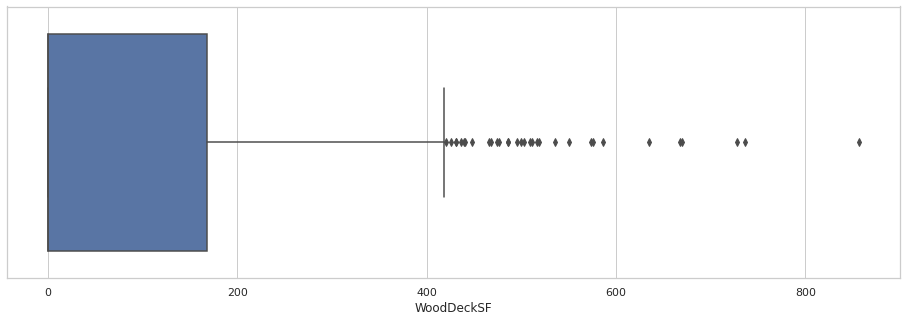

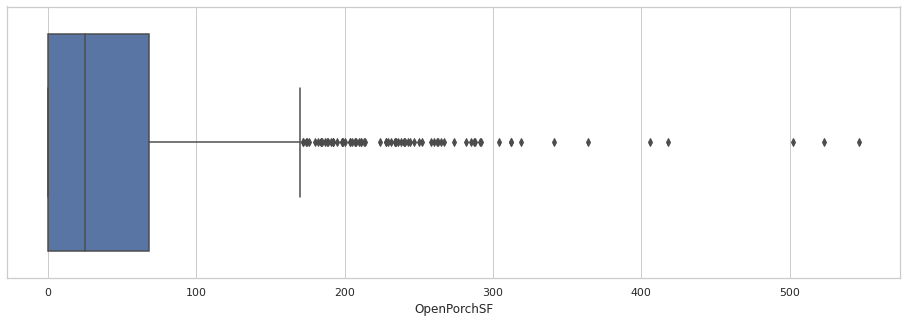

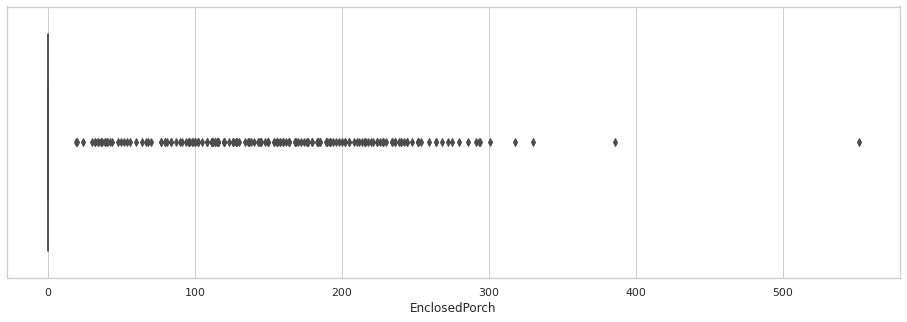

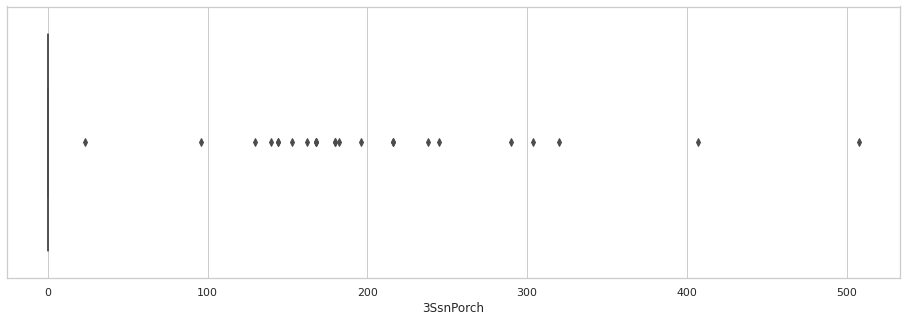

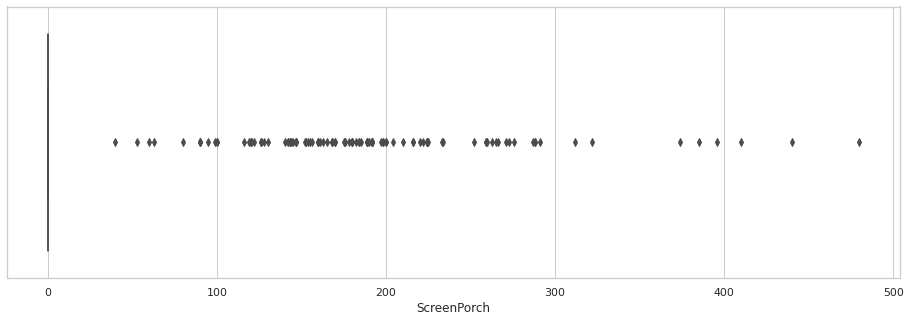

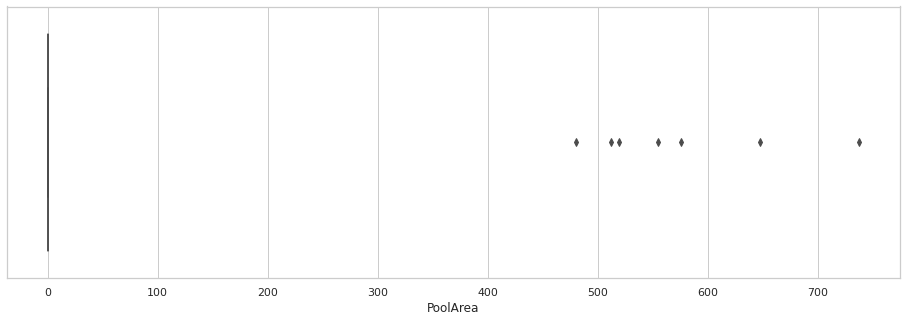

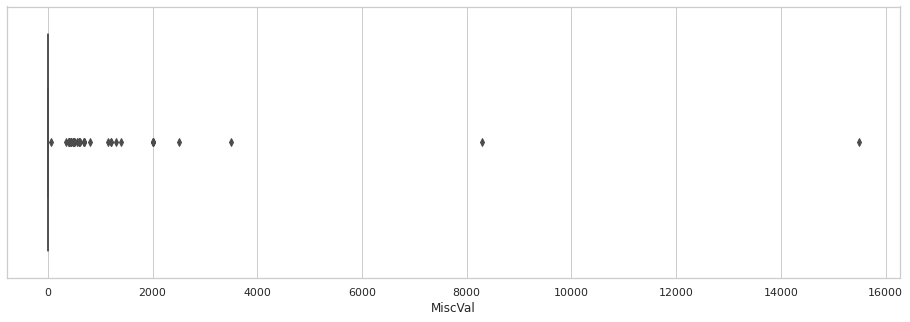

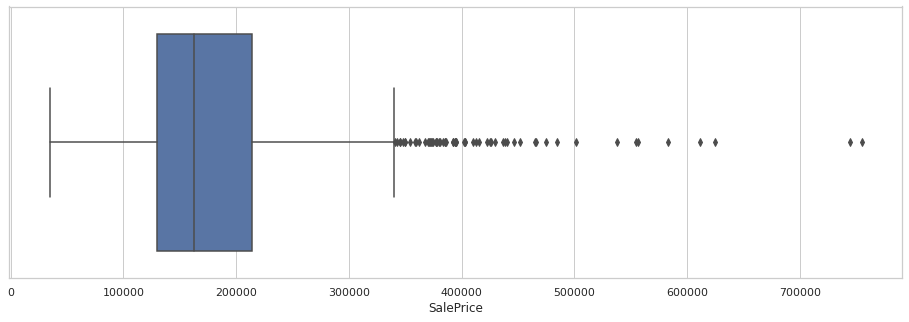

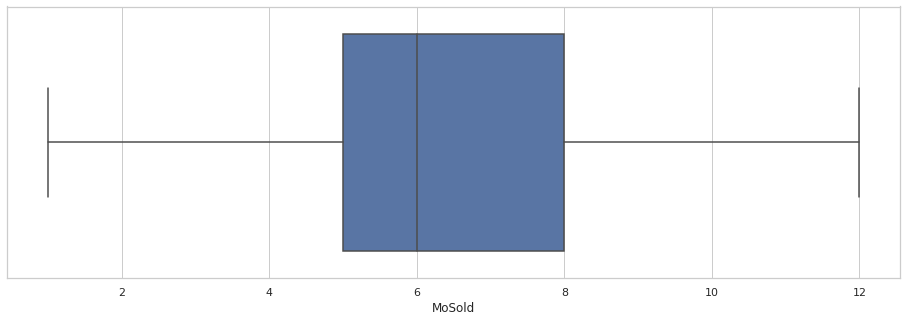

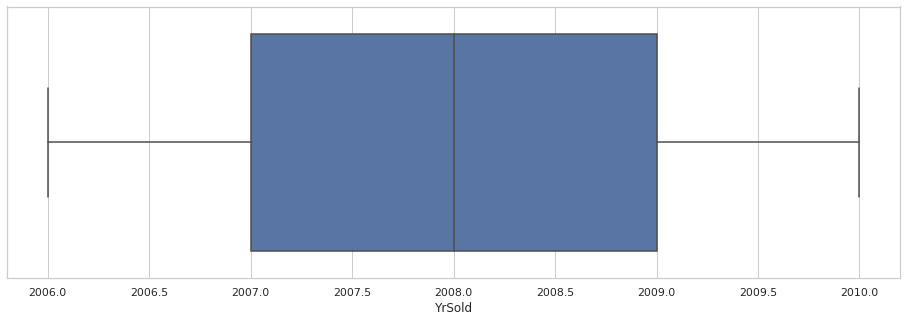

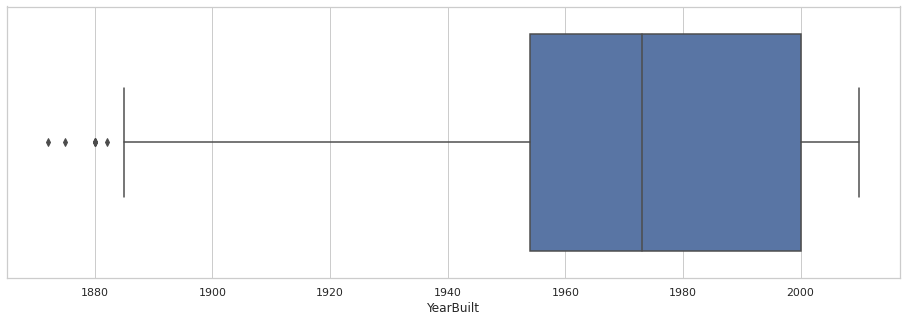

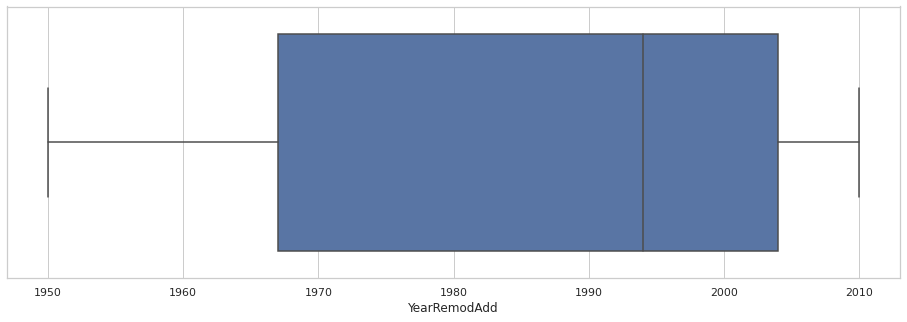

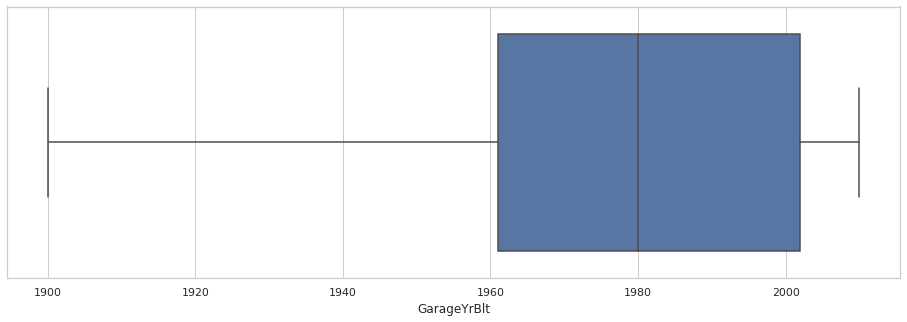

In [28]:
%matplotlib inline

sns.set_theme(style="whitegrid")

for c in df_num.columns:
    plt.figure(figsize=(16, 5))
    sns.boxplot(x=df_num[c])

## Limitar atipicos

- Validar si esta bien que limitemos los valores atipicos o si es mejor eliminarlos

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

### Limita valores atipicos con el minimo o maximo valor no atipico

class ClipOutliers(BaseEstimator, TransformerMixin):
    
    def __init__(self, num_cols):
        self.num_cols = num_cols
        self.stats = {}
    
    def fit(self, X, y=None):
        
        df = X.copy()
        
        for c in self.num_cols:
            self.stats[c] = dict()
            
            iqr = df[c].quantile(0.75) - df[c].quantile(0.25)

            self.stats[c]['lower_bound'] = df[c].quantile(0.25) - 1.5*iqr
            self.stats[c]['upper_bound'] = df[c].quantile(0.75) + 1.5*iqr
            
            valid_range = (df[c] >= self.stats[c]['lower_bound']) & (df[c] <= self.stats[c]['upper_bound'])
            self.stats[c]['min_value'] = df.loc[valid_range, c].min()
            self.stats[c]['max_value'] = df.loc[valid_range, c].max()
            
        return self
    
    def transform(self, X):
        
        df = X.copy()
        
        for c in self.num_cols:
            df.loc[df[c] <= self.stats[c]['lower_bound'], c] = self.stats[c]['min_value']
            df.loc[df[c] >= self.stats[c]['upper_bound'], c] = self.stats[c]['max_value']
            
        return df

In [ ]:
t = ClipOutliers(df_num.columns.tolist())

t.fit(df_num)

In [ ]:
t.stats

In [ ]:
df_num.describe()

In [ ]:
df_num_sinatipicos = t.transform(df_num)

In [ ]:
%matplotlib inline
df_num_sinatipicos.hist(bins=50, figsize=(16,16))
plt.show()

- Validar si esta bien que hagamos cambios, i.e quitar un baño

## Imputacion de valores perdidos

# Step 4. Transformacion de datos

### Distribuciones

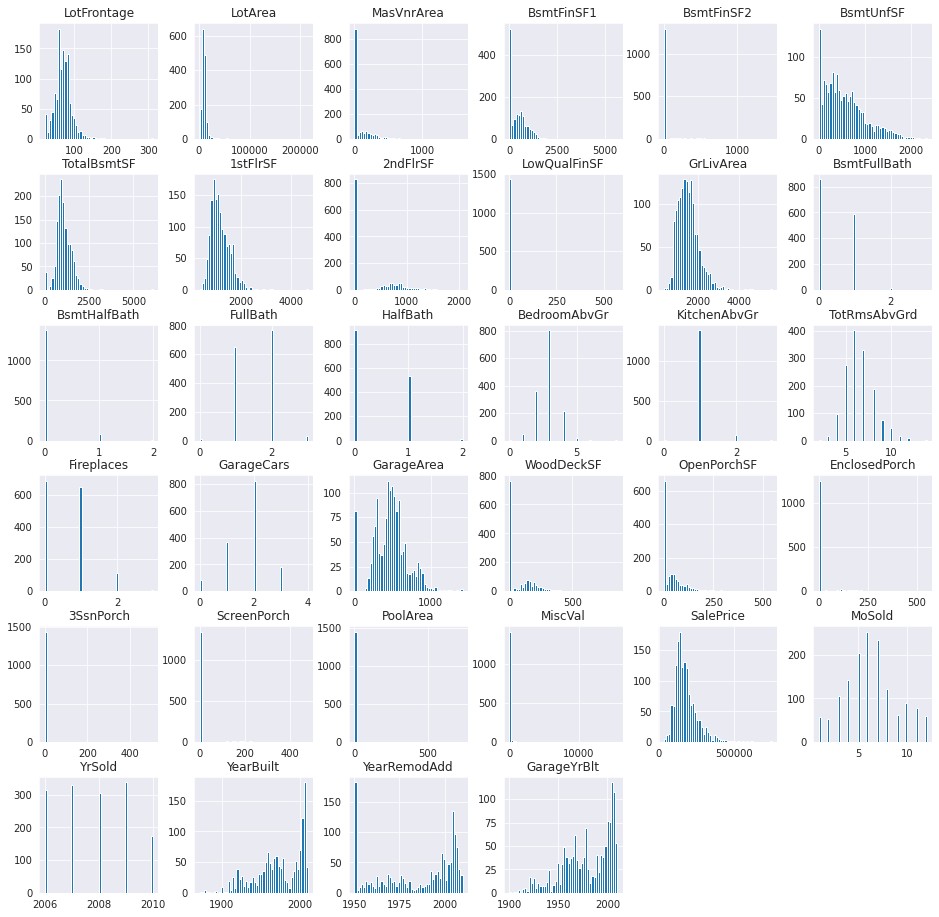

In [18]:
%matplotlib inline
df_num.hist(bins=50, figsize=(16,16))
plt.show()

## Estandarizar

## Normalizar

In [38]:
df_num.shape

(1460, 34)

In [61]:
print(len(df_num[(df_num['EnclosedPorch'] > 0) & (df_num['3SsnPorch'] > 0)]))
print(len(df_num[(df_num['EnclosedPorch'] > 0) & (df_num['ScreenPorch'] > 0)]))
print(len(df_num[(df_num['3SsnPorch'] > 0) & (df_num['ScreenPorch'] > 0)]))

1
6
0


In [63]:
len(df_num[df_num.YearBuilt <= 1880])

6

In [69]:
len(df_num[df_num.GarageYrBlt.isna()])

81